In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

KHẢO SÁT DỮ LIỆU VỀ MỨC ĐỘ CÁC PHẢN HỒI CỦA HÀNH KHÁCH ĐỐI VỚI CÁC HÃNG MÁY BAY
Dữ liệu TwitterUSAirlineSentiment.csv bao gồm các cột.
- airline_sentiment: Các mức độ phản hồi (positive, neutral, negative)
- airline_sentiment_confidence: đô tin cậy của phản hồi
- negativereason_confidence: độ tin cậy của lý do phủ định
- airline: Hãng máy bay (Virgin America, United, Southwest, Delta, US Airways, American)
- name: tên của hành khách phản hồi
- text: phản hồi dạng chữ
- user_timezone: múi giờ

Yêu cầu:
1.	(1 điểm) Đọc dữ liệu và hiển thị 10 dòng dữ liệu đầu tiên
2.	(3 điểm) Tìm hiểu thông tin về dữ liệu:
- a.	Số lượng phản hồi của mỗi hãng máy bay và số lượng phản hồi mỗi mức độ của từng hãng máy bay.
- b.	Với mỗi mức độ phản hồi của từng hãng máy bay, hãy xác định các tham số thống kê: giá trị trung bình, độ lệch chuẩn của các thuộc tính đô tin cậy của phản hồi (airline_sentiment_confidence), độ tin cậy của lý do phủ định (negativereason_confidence); và độ đo xu hướng tập trung (central tendency) của thuộc tính múi giờ (user_timezone).
3.	 (3 điểm) Đồ thị hóa dữ liệu:
- a.	Số lượng phản hồi của mỗi hãng máy bay bằng đồ thị tròn.
- b.	Bằng đồ thị hộp râu (box plot) biểu diễn trực quan về cách dữ liệu của  thuộc tính đô tin cậy của phản hồi (airline_sentiment_confidence) theo hãng hàng không nằm rải rác trên mặt phẳng, so sánh giữa các mức độ phản hồi.
 
- c.	Bằng đồ thị phù hợp biểu diễn sự tương quan bằng màu sắc giữa các thuộc tính dựa trên hệ số tương quan. 
4.	(3 điểm) Đường kính của một loại chi tiết do một máy sản xuất có phân phối chuẩn, kỳ vọng 20mm, độ lệch chuẩn 0,2mm). Lấy ngẫu nhiên 1 chi tiết máy. Tính xác suất để
- a.	có đường kính nhỏ hơn 20,3mm
- b.	có đường kính trong khoảng 19,9mm đến 20,3mm,
- c.	có đường kính sai khác với kỳ vọng không quá 0,3mm.


## Câu 1: 

In [64]:
# đọc dữ liệu và in 10 dòng
df = pd.read_csv("TwitterUSAirlineSentiment.csv")
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/2/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/2/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/2/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/2/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/2/2015 11:14,NaN,Pacific Time (US & Canada)
5,5.703010e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,24/2/2015 11:14,NaN,Pacific Time (US & Canada)
6,5.703010e+17,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,24/2/2015 11:13,San Francisco CA,Pacific Time (US & Canada)
7,5.703000e+17,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,24/2/2015 11:12,Los Angeles,Pacific Time (US & Canada)
8,5.703000e+17,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,24/2/2015 11:11,San Diego,Pacific Time (US & Canada)
9,5.702950e+17,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,24/2/2015 10:53,Los Angeles,Eastern Time (US & Canada)


## Câu 2:

In [55]:
# a) Số lượng phản hồi của mỗi hãng máy bay và số lượng phản hồi mỗi mức độ của từng hãng máy bay.
airline_counts = df["airline"].value_counts()
print("Số lượng phản hồi của mỗi hãng máy bay :")
print(airline_counts)

airline_sentiment_counts = df.groupby(["airline", "airline_sentiment"]).size().reset_index(name="counts")
print("Số lượng phản hòi mỗi mức độ của từng hãng máy bay")
print(airline_sentiment_counts)

Số lượng phản hồi của mỗi hãng máy bay :
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64
Số lượng phản hòi mỗi mức độ của từng hãng máy bay
           airline airline_sentiment  counts
0         American          negative    1960
1         American           neutral     463
2         American          positive     336
3            Delta          negative     955
4            Delta           neutral     723
5            Delta          positive     544
6        Southwest          negative    1186
7        Southwest           neutral     664
8        Southwest          positive     570
9       US Airways          negative    2263
10      US Airways           neutral     381
11      US Airways          positive     269
12          United          negative    2633
13          United           neutral     697
14          United          positive     492
15  Virgin America    

In [56]:
# b)
## xác định các tham số thông kê theo mean và std
confident_stats = df.groupby(["airline", "airline_sentiment"]).agg({
    "airline_sentiment_confidence" : ["mean", "std"],
    "negativereason_confidence" : ["mean", "std"]
}).reset_index()

print("Thống kê các tham số:")
print(confident_stats)

Thống kê các tham số:
           airline airline_sentiment airline_sentiment_confidence            \
                                                             mean       std   
0         American          negative                     0.944955  0.124992   
1         American           neutral                     0.825938  0.186387   
2         American          positive                     0.882302  0.169425   
3            Delta          negative                     0.902202  0.162831   
4            Delta           neutral                     0.829264  0.185266   
5            Delta          positive                     0.867111  0.177139   
6        Southwest          negative                     0.920533  0.147741   
7        Southwest           neutral                     0.826109  0.186759   
8        Southwest          positive                     0.886105  0.173846   
9       US Airways          negative                     0.945714  0.126575   
10      US Airways           n

In [57]:
## độ đo xu hướng tập trung  của user_timezone
timezone_central_tendency = df["user_timezone"].mode()[0]
print("Độ đo xu hướng tập chung của thuộc tính")
print(timezone_central_tendency)

Độ đo xu hướng tập chung của thuộc tính
Eastern Time (US & Canada)


## Câu 3:

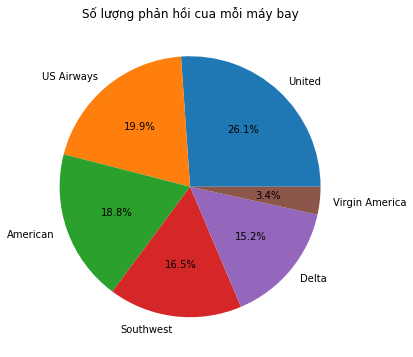

In [58]:
# a) Số lượng phản hồi của mỗi hãng máy bay bằng đồ thị tròn
plt.figure(figsize=(10, 6))
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%')
plt.title("Số lượng phản hồi cua mỗi máy bay")
plt.show()

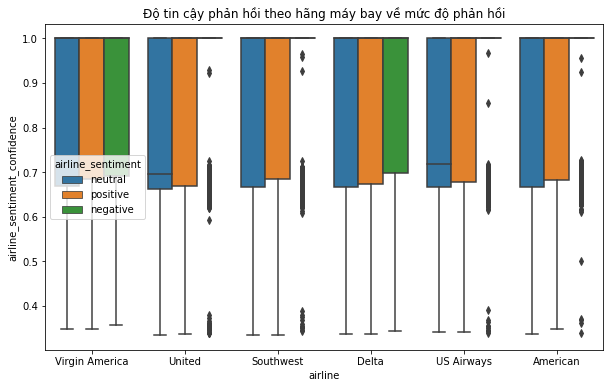

In [59]:
# b) Bằng đồ thị hộp râu (box plot) biểu diễn trực quan về cách dữ liệu của  thuộc tính đô tin cậy của phản hồi
plt.figure(figsize=(10,6))
sns.boxplot(x="airline", y="airline_sentiment_confidence", hue="airline_sentiment", data=df)
plt.title("Độ tin cậy phản hồi theo hãng máy bay về mức độ phản hồi")
plt.show()

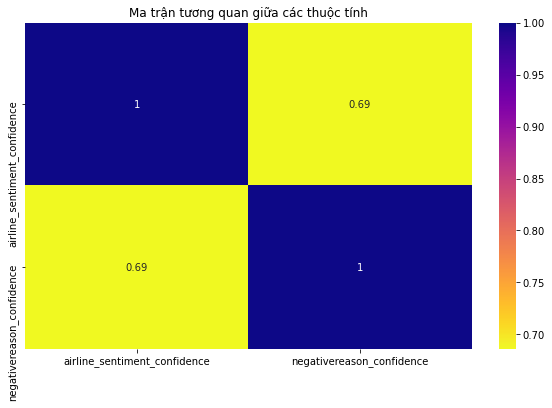

In [60]:
## c) Bằng đồ thị phù hợp biểu diễn sự tương quan bằng màu sắc giữa các thuộc tính dựa trên hệ số tương quan. 
correlation_matrix = df[["airline_sentiment_confidence", "negativereason_confidence"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="plasma_r")
plt.title("Ma trận tương quan giữa các thuộc tính")
plt.show()

# Câu 4:

In [61]:
mean = 20
std = 0.2


# a) có đường kính nhỏ hơn 20,3mm 
prob_less_203 = stats.norm.cdf(20.3, mean, std)
print("Xác suất để đường kính nhỏ hơn 20.3mm là :", prob_less_203)

Xác suất để đường kính nhỏ hơn 20.3mm là : 0.9331927987311424


In [62]:
# b) có đường kính trong khoảng 19,9mm đến 20,3mm,
pro_bet_199_and_203 = stats.norm.cdf(20.3, mean, std) - stats.norm.cdf(19.9, mean, std)
print("Xác suát để đường kính trong khoảng 19.9 đé 20.3 là : ", pro_bet_199_and_203)

Xác suát để đường kính trong khoảng 19.9 đé 20.3 là :  0.624655260005158


In [63]:
# c) có đường kính sai khác với kỳ vọng không quá 0,3mm
pro_within_03 = stats.norm.cdf(20.3, mean, std) - stats.norm.cdf(19.7, mean, std)
print("Xác suất để đường kính k sai khác với kỳ vọng không quá 0.3 là : ", pro_within_03)

Xác suất để đường kính k sai khác với kỳ vọng không quá 0.3 là :  0.8663855974622847
